In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

columns = [
            'dport', 'sport','protocol', 'flags', 'time bw prev packet','spkts','dpkts' ,'pkt_len','ttl', 'payload size', 'label'
        ]

dataset = pd.read_csv('../datasets/dataset.csv')
dataset.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label
0,22,53028,6,S,1.714155e+09,0,40,0,64,224,benign
1,53028,22,6,SA,5.626678e-04,40,0,0,64,224,benign
2,22,53028,6,A,3.991127e-03,0,32,0,64,224,benign
3,22,53028,6,PA,6.892681e-04,0,64,32,64,224,benign
4,53028,22,6,A,4.396439e-04,32,0,0,64,224,benign


In [23]:
len(dataset.index)

357889

In [24]:
if mixed_dtypes := {c: dtype for c in dataset.columns if (dtype := pd.api.types.infer_dtype(dataset[c])).startswith("mixed")}:
    print(f"Columns with mixed data types: {mixed_dtypes}")


In [25]:
# Replace 'nan' values with -1

dataset.fillna({'flags':'9'}, inplace=True)
dataset

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label
0,22,53028,6,S,1.714155e+09,0,40,0,64,224,benign
1,53028,22,6,SA,5.626678e-04,40,0,0,64,224,benign
2,22,53028,6,A,3.991127e-03,0,32,0,64,224,benign
3,22,53028,6,PA,6.892681e-04,0,64,32,64,224,benign
4,53028,22,6,A,4.396439e-04,32,0,0,64,224,benign
...,...,...,...,...,...,...,...,...,...,...,...
357884,3240,36657,6,S,1.001930e-02,0,26,2,48,248,nmap
357885,42216,36657,6,S,1.999855e-03,0,26,2,41,248,nmap
357886,42216,36657,6,S,4.500389e-03,0,26,2,41,248,nmap
357887,28478,36657,6,S,2.504349e-03,0,26,2,57,248,nmap


In [26]:
dataset[dataset['flags'].isna()] # No values are NaN now

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size,label


In [27]:
# We need to perform one hot encoding the flags parameter

def flags_to_encode(tcp_flags: str) -> int:
    if tcp_flags == '':
        print('empty string found')
    flag_mapping = {
        'F': '8',
        'S': '1',
        'R': '2',
        'P': '3',
        'A': '4',
        'U': '5',
        'E': '6',
        'C': '7',
        '0': '0',
        '9': '9'
    }
    list_of_flags = list()
    try:
        list_of_flags = list(tcp_flags)
    except:
        print(tcp_flags)
    encoded_flag = ''
    for flag in list_of_flags:
        encoded_flag += flag_mapping[flag]
    
    return int(encoded_flag)

dataset['flags'] = dataset['flags'].apply(flags_to_encode)

In [28]:
# Getting data and label
X = dataset[columns[:-1]] # exclude the last column
y = dataset.label
X.head()

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size
0,22,53028,6,1,1.714155e+09,0,40,0,64,224
1,53028,22,6,14,5.626678e-04,40,0,0,64,224
2,22,53028,6,4,3.991127e-03,0,32,0,64,224
3,22,53028,6,34,6.892681e-04,0,64,32,64,224
4,53028,22,6,4,4.396439e-04,32,0,0,64,224


In [29]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X.head(20)

,dport,sport,protocol,flags,time bw prev packet,spkts,dpkts,pkt_len,ttl,payload size
0,22,53028,6,1,1.714155e+09,0,40,0,64,224
1,53028,22,6,14,5.626678e-04,40,0,0,64,224
2,22,53028,6,4,3.991127e-03,0,32,0,64,224
3,22,53028,6,34,6.892681e-04,0,64,32,64,224
4,53028,22,6,4,4.396439e-04,32,0,0,64,224
5,53028,22,6,34,7.616520e-03,73,0,41,64,224
6,22,53028,6,4,1.584077e-02,0,32,0,64,224
7,53028,22,6,34,4.515648e-04,1144,0,1112,64,224
8,22,53028,6,34,3.829002e-04,0,1568,1536,64,224
9,53028,22,6,4,3.502369e-04,32,0,0,64,224


In [30]:
# Building the decision tree
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

In [31]:
# Model evaluation

print(f'Accuracy: {metrics.accuracy_score(y_test,y_pred)}')

Accuracy: 0.9999906861512383


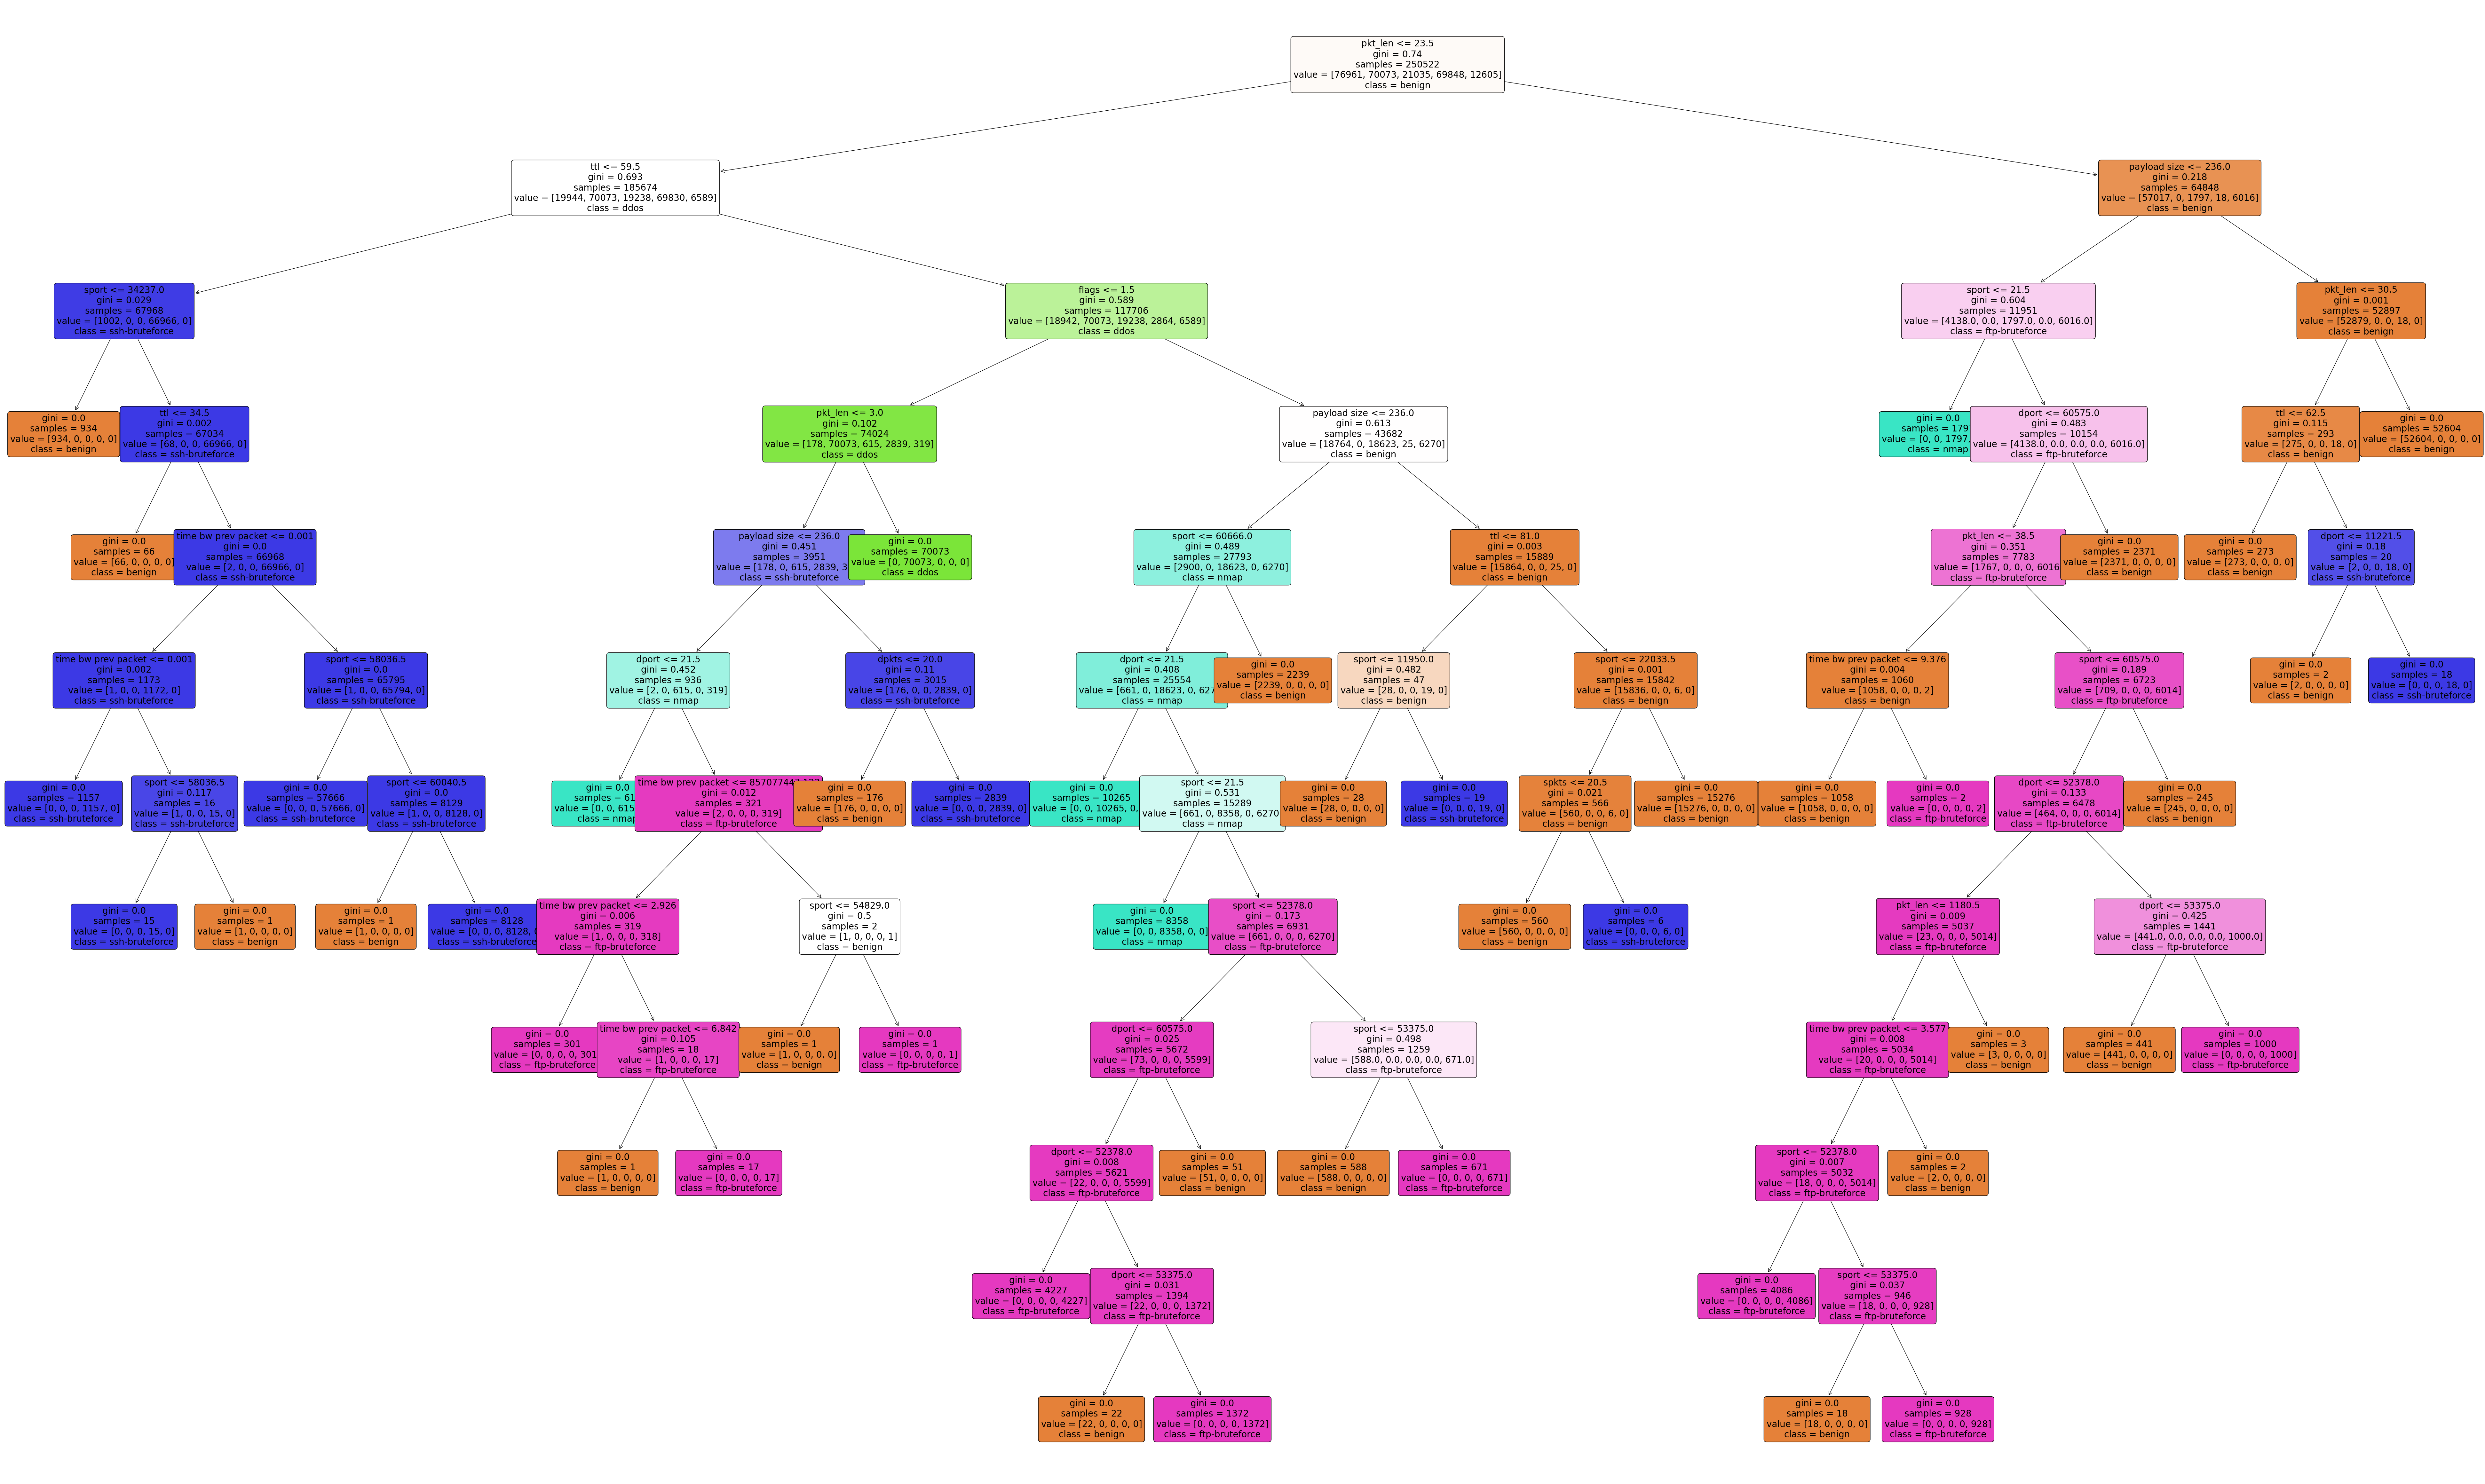

In [32]:
# Visualizing the tree
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(100, 60))

_ = plot_tree(decision_tree=model, 
              feature_names=columns[:-1],
              class_names=['benign', 'ddos', 'nmap', 'ssh-bruteforce', 'ftp-bruteforce'],
              filled=True, rounded=True, fontsize=20)
plt.savefig('decision_tree.png')
plt.show()

In [33]:
from sklearn.tree import export_graphviz
import pydot
export_graphviz(model, out_file=open('tree.dot', 'w'), feature_names=columns[:-1],
                filled=True, rounded=True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('dt_tree.png')

In [34]:
from joblib import dump

dump(model, 'dt_classifier.pkl')

['dt_classifier.pkl']

In [35]:
len(dataset.index)

357889